In [7]:
import xml.dom.minidom
import os
import os.path
import matplotlib.pyplot as plt

# get_numbers_from_string
def gnfs(string):
    return [int(i) for i in string.split() if i.isdigit()]


In [11]:

if not os.path.isfile("performance_data.xml"):
    print("running command")
    os.system("../build/meanderrunner_tests -r xml -o performance_data.xml")



running command


In [12]:
doc = xml.dom.minidom.parse("performance_data.xml")


In [13]:

testcases = doc.getElementsByTagName("TestCase")

print(testcases)

x = []
y = []
Sy = []

for testcase in testcases:
    if "performance" in testcase.getAttribute("name"):
        datapoints = testcase.getElementsByTagName("BenchmarkResults")
        print(datapoints)
        for point in datapoints:
            x.append(gnfs(point.getAttribute("name"))[0])
            y.append(int(float(point.getElementsByTagName("mean")[0].getAttribute("value"))))
            Sy.append(int(float(point.getElementsByTagName("standardDeviation")[0].getAttribute("value"))))

print(x, y, Sy)


[<DOM Element: TestCase at 0x7ffd80682910>, <DOM Element: TestCase at 0x7ffd8068b4b0>, <DOM Element: TestCase at 0x7ffd60b27230>, <DOM Element: TestCase at 0x7ffd60b27370>]
[<DOM Element: BenchmarkResults at 0x7ffd60b27410>, <DOM Element: BenchmarkResults at 0x7ffd60b27690>, <DOM Element: BenchmarkResults at 0x7ffd60b27910>, <DOM Element: BenchmarkResults at 0x7ffd60b27b90>, <DOM Element: BenchmarkResults at 0x7ffd60b27e10>, <DOM Element: BenchmarkResults at 0x7ffd60b360f0>]
[100, 1000, 10000, 100000, 1000000, 10000000] [23112000, 26463000, 39102100, 50279500, 74910600, 174753000] [1289260, 2294850, 6701880, 3377550, 20682600, 154785000]


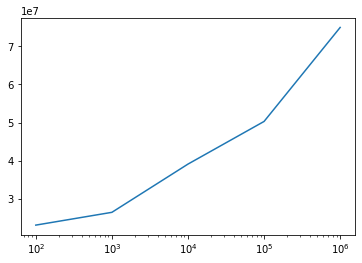

In [20]:
plt.errorbar(x[:-1], y[:-1])
plt.xscale("log")
plt.show()

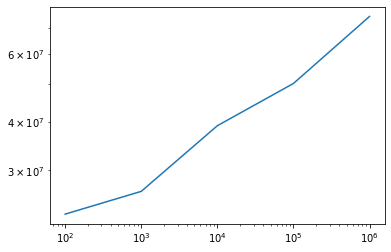

In [21]:

plt.errorbar(x[:-1], y[:-1])
plt.loglog()

plt.show()